In [1]:
import numpy as np

def gabor(sigma, theta, Lambda, psi, gamma):
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

In [2]:
gamma = 1
sigma_scales = [18, 24, 30, 36, 42]
angles = 8

Lambda = 30 
psi = 30

gabor_bank = []
for sigma in sigma_scales:
    for i in range(angles):

        theta = i * np.pi / angles
        gb = gabor(sigma, theta, Lambda, psi, gamma)
        gabor_bank.append(gb)

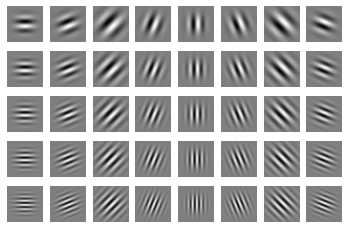

In [3]:
import matplotlib.pyplot as plt

for i in range(len(gabor_bank)):
    plt.subplot(5,8,i+1)
    plt.axis('off')
    plt.imshow(gabor_bank[i], cmap = 'gray')

In [4]:

    import numpy as np
    
    sigma = 30
    gamma = 1
    
    theta = 45
    Lambda = 30 
    psi = 30

    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (x, y) = np.meshgrid(np.arange(xmin, xmax + 1), np.arange(ymin, ymax + 1))
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta) 

    gb = np.exp(-.5 * ((x_theta ** 2 + y_theta ** 2 )/ sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)

In [5]:
gb.shape

(155, 155)

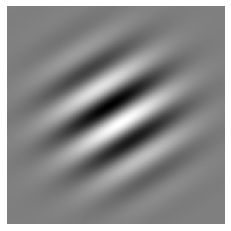

In [6]:
import matplotlib.pyplot as plt

plt.subplot(1,1,1)
plt.axis('off')
plt.imshow(gb, cmap = 'gray')